<a href="https://colab.research.google.com/github/3agleman/DS-4002-MI3/blob/main/SCRIPTS/r_data_merge_and_visualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

# Load the datasets
gameplay_data_path = "steam_reviews_with_gameplay_elements.csv"  # Your processed gameplay elements dataset
sentiment_data_path = "sentiment_analysis_results.csv"  # The R sentiment analysis file

df_gameplay = pd.read_csv(gameplay_data_path)
df_sentiment = pd.read_csv(sentiment_data_path)

# Display column names to check for alignment
print("Gameplay Data Columns:", df_gameplay.columns)
print("Sentiment Data Columns:", df_sentiment.columns)

# Merge based on 'review_id' (or another common column)
merged_df = df_gameplay.merge(df_sentiment[['review_id', 'review_sentiment']], on="review_id", how="left")

# Save merged dataset
output_path = "final_steam_reviews.csv"
merged_df.to_csv(output_path, index=False)

print(f"Merged dataset saved as: {output_path}")


Gameplay Data Columns: Index(['X', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played', 'cleaned_text',
       'tokens', 'gameplay_elements'],
      dtype='object')
Sentiment Data Columns: Index(['X', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_fo

In [9]:
import pandas as pd

# Load the datasets
gameplay_data_path = "steam_reviews_with_gameplay_elements.csv"  # Processed gameplay elements dataset
sentiment_data_path = "sentiment_analysis_results.csv"  # R sentiment analysis results

df_gameplay = pd.read_csv(gameplay_data_path)
df_sentiment = pd.read_csv(sentiment_data_path)

# Display column names to check alignment
print("Gameplay Data Columns:", df_gameplay.columns)
print("Sentiment Data Columns:", df_sentiment.columns)

# Merge based on 'review_id' (adjust if needed)
merged_df = df_gameplay.merge(df_sentiment[['review_id', 'review_sentiment']], on="review_id", how="left")

# Save merged dataset
output_path = "final_steam_reviews.csv"
merged_df.to_csv(output_path, index=False)

print(f"Merged dataset saved as: {output_path}")


Gameplay Data Columns: Index(['X', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played', 'cleaned_text',
       'tokens', 'gameplay_elements'],
      dtype='object')
Sentiment Data Columns: Index(['X', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_fo

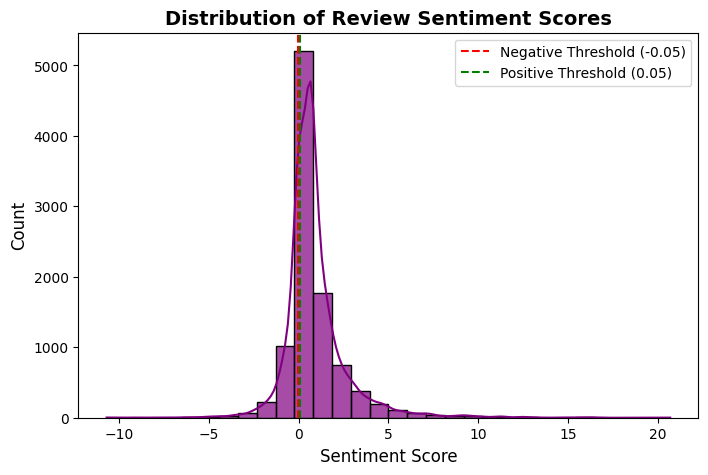

<ipython-input-12-3cc92d4ee30c>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gameplay_df['Gameplay Element'], y=gameplay_df['Frequency'], palette="magma")


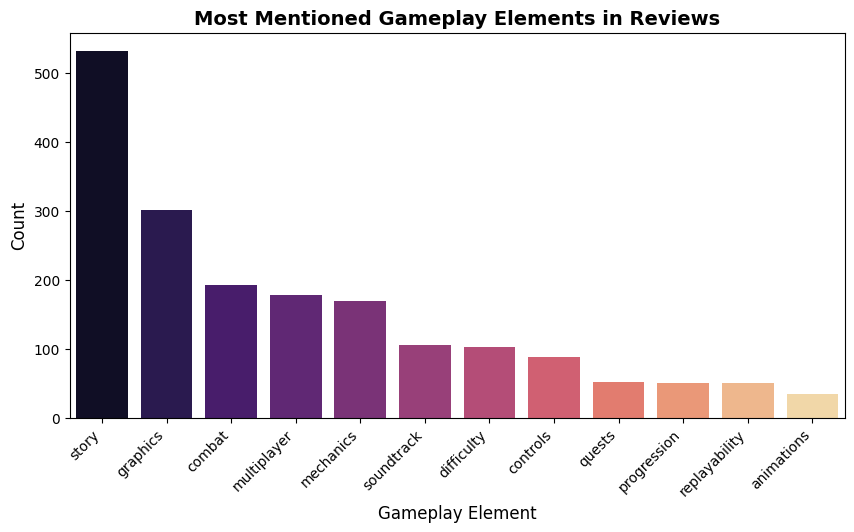

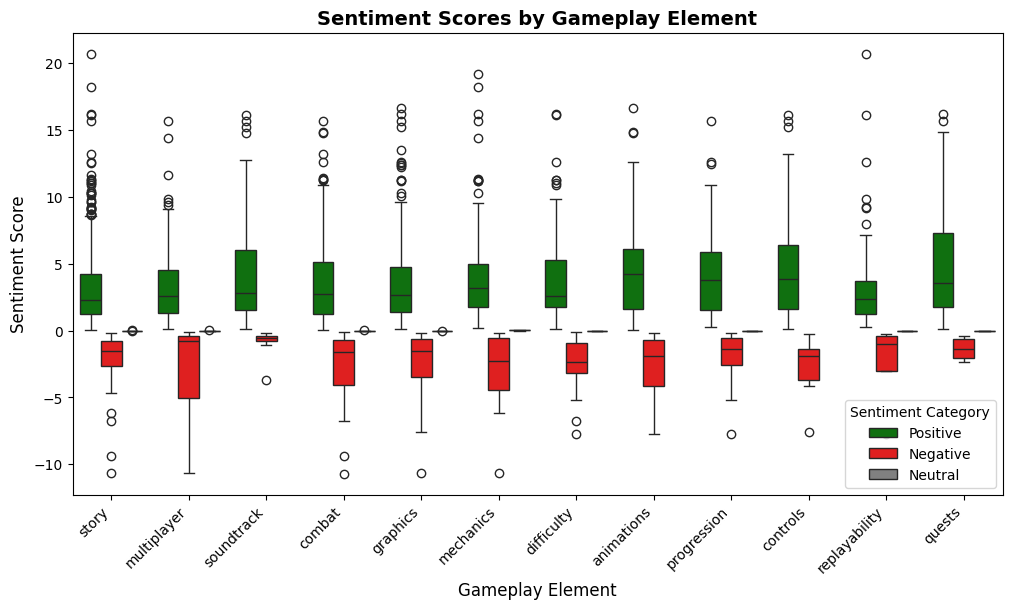

<ipython-input-12-3cc92d4ee30c>:85: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Gameplay Element", y="Recommended", data=recommendation_df, ci=None, palette="coolwarm")
<ipython-input-12-3cc92d4ee30c>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Gameplay Element", y="Recommended", data=recommendation_df, ci=None, palette="coolwarm")


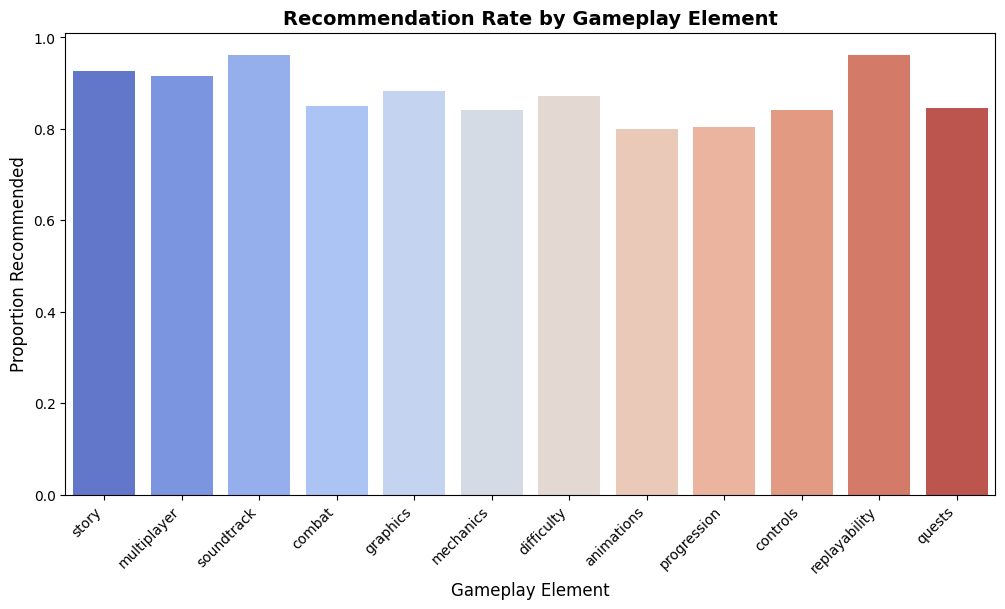

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

# Load the merged dataset
file_path = "final_steam_reviews.csv"
df = pd.read_csv(file_path)

# Ensure gameplay elements are stored as lists
df['gameplay_elements'] = df['gameplay_elements'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Define a color palette for sentiment categories
sentiment_palette = {
    "Negative": "red",
    "Neutral": "gray",
    "Positive": "green"
}

# Classify sentiment
def classify_sentiment(score):
    if score < -0.05:
        return "Negative"
    elif score > 0.05:
        return "Positive"
    else:
        return "Neutral"

df['sentiment_category'] = df['review_sentiment'].apply(classify_sentiment)

# --- Sentiment Distribution ---
plt.figure(figsize=(8,5))
sns.histplot(df['review_sentiment'], bins=30, kde=True, color="purple", alpha=0.7)
plt.title("Distribution of Review Sentiment Scores", fontsize=14, fontweight="bold")
plt.xlabel("Sentiment Score", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Add legend
plt.axvline(x=-0.05, color="red", linestyle="--", label="Negative Threshold (-0.05)")
plt.axvline(x=0.05, color="green", linestyle="--", label="Positive Threshold (0.05)")
plt.legend()

plt.show()

# --- Most Mentioned Gameplay Elements ---
gameplay_counts = Counter([elem for sublist in df['gameplay_elements'] for elem in sublist])
gameplay_df = pd.DataFrame(gameplay_counts.items(), columns=['Gameplay Element', 'Frequency']).sort_values(by="Frequency", ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=gameplay_df['Gameplay Element'], y=gameplay_df['Frequency'], palette="magma")
plt.xticks(rotation=45, ha='right')
plt.title("Most Mentioned Gameplay Elements in Reviews", fontsize=14, fontweight="bold")
plt.xlabel("Gameplay Element", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

# --- Sentiment vs Gameplay Elements ---
# Flatten data for better visualization
sentiment_data = []
for _, row in df.iterrows():
    for element in row['gameplay_elements']:
        sentiment_data.append((element, row['review_sentiment'], classify_sentiment(row['review_sentiment'])))

sentiment_df = pd.DataFrame(sentiment_data, columns=["Gameplay Element", "Sentiment Score", "Sentiment Category"])

plt.figure(figsize=(12,6))
sns.boxplot(x="Gameplay Element", y="Sentiment Score", data=sentiment_df, hue="Sentiment Category", palette=sentiment_palette)
plt.xticks(rotation=45, ha='right')
plt.title("Sentiment Scores by Gameplay Element", fontsize=14, fontweight="bold")
plt.xlabel("Gameplay Element", fontsize=12)
plt.ylabel("Sentiment Score", fontsize=12)
plt.legend(title="Sentiment Category")
plt.show()

# --- Recommendation Rate by Gameplay Element ---
recommendation_data = []
for _, row in df.iterrows():
    for element in row['gameplay_elements']:
        recommendation_data.append((element, row['recommended']))

recommendation_df = pd.DataFrame(recommendation_data, columns=["Gameplay Element", "Recommended"])
recommendation_df["Recommended"] = recommendation_df["Recommended"].astype(int)

plt.figure(figsize=(12,6))
sns.barplot(x="Gameplay Element", y="Recommended", data=recommendation_df, ci=None, palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title("Recommendation Rate by Gameplay Element", fontsize=14, fontweight="bold")
plt.xlabel("Gameplay Element", fontsize=12)
plt.ylabel("Proportion Recommended", fontsize=12)
plt.show()
